# The Sparks Foundation #GRIPFEB21
***
# Task 1: Prediction using Supervised ML
***
# Author: Yadnesh Potdar 
***
# Problem: Predict the percentage of an student based on the no. of study hours.
***
### ***Here we will predict the percentage of marks that a student is expected to score based on the number of hours they studied. Since there are only 2 variables this is a Simple Linear Regression Problem.***
***

# Importing Necessary Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Importing the data

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Imported Sucessfully")

Data Imported Sucessfully


# Checking the data

In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking for null values

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### ***There are no missing values***

### We create a scatterplot to check for any relashionship between the two variables in our dataset

Text(0, 0.5, 'Percentage Score')

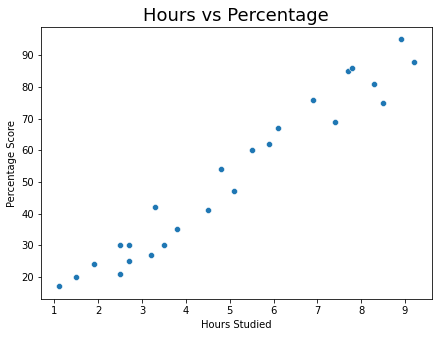

In [8]:
#Visualizing the data by Plotting distribution of scores
plt.figure(figsize = (7, 5))
sns.scatterplot(x = "Hours", y = "Scores", data = data)
plt.title("Hours vs Percentage", size = 18)  
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")


### ***From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.***

# Preparing the data

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

### Splitting the data into test and train dataset

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                            test_size = 0.2, random_state = 123)



# Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Model Training Complete")

Model Training Complete


### We create a scatterplot with a regression line passing through the data points.

Text(0.5, 1.0, 'Regression Line')

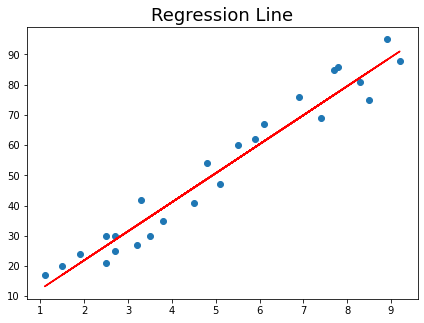

In [18]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_
plt.figure(figsize = (7, 5))
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color = "red");
plt.title("Regression Line", size = 18)

# Making Predictions

### Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
print(x_test) # Test data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [4.8]
 [3.8]
 [6.1]
 [8.9]]


### Making a Dataframe to compare Actual vs Predicted

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})  
df 

,Actual,Predicted
0,20,17.097967
1,54,48.783639
2,35,39.181920
3,67,61.265873
4,95,88.150686


# Testing with own data

### Testing with hours = 9.25

In [15]:
# We can also test with our own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format([[hours]]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 91.51128761861357


# Evaluating the model

### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

### Mean Absolute Error

In [16]:
from sklearn import metrics  
print("Mean Absolute Error:", 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.9767509236804015


# END